# HW 3

In this homework, we will use numpy to build logistic regression, the simplest classification algorithm.

We can also think of logistic regression as a nueral network with only 1 nueron.

For more information on the intuition behind Logistic Regression please see Logistic_Regression.pptx in Week_1/Class_3

In [1]:
%load_ext memory_profiler

In [2]:
#Preliminaries

#Imports
import math
import numpy as np
import sklearn.datasets
#don't worry about matplot yet, I'll do the plotting for you.
import matplotlib.pyplot as plt


iris = sklearn.datasets.load_iris()
#Just take first two features to make it easier to plot
X = iris.data[:, :2]
y = iris.target

#Just take class 0 and 1
X = X[y!=2]
y = y[y!=2]


#These would be hyperparameters in your logistic regression that I have set for you
#Feel free to play around with these after completing the assignment
alpha = 0.01
num_iter = 1000

Let's plot the two classes so we can see what we're working with

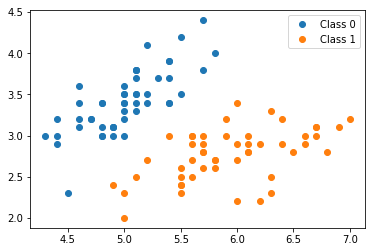

In [3]:
X0 = X[y==0]
X1 = X[y==1]
plt.plot(X0[:,0],X0[:,1],'o',label='Class 0')
plt.plot(X1[:,0],X1[:,1],'o',label='Class 1')
plt.legend()
plt.show()

We can clearly imagine a linear boundary between the two classes. Thus, logistic regression should work well.

## Your task:
I will present you the code behind logistic regression using loops and no vectorization. You will time this code. You will them remove the loops layer by layer and see how the speed increases each time.

# Iteration 0: All loops

In [4]:
def add_intercept(X):
    #Add the intercept to our dataset
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)
    
def sigmoid(z):
    #Sigmoid Function
    #Create sigmoided list element by element
    sig = []
    for ele in z:
        sigi = 1  / (1+ np.exp(-ele))
        sig.append(sigi)
    return sig

def loss(h, y):
    #Cross Entropy Loss
    
    #Create loss list element by element
    
    loss_list = []
    for i in range(len(y)):
        loss_i = (-y[i] * math.log(h[i])) - (1-y[i]) * math.log(1-h[i])
        loss_list.append(loss_i)
    
    #Get sum of loss_list
    tot = 0
    for ele in loss_list:
        tot+=ele
    
    #Return mean of loss_list by dividing tot by number of elements in it
    return tot/len(loss_list)
    
def fit(X, y,num_iter,alpha,verbose=True):
    
    #add intercept
    X = add_intercept(X)
        
    # weights initialization
    theta = np.zeros(X.shape[1])
    
    #Note: we cannot remove this loop at there is a temporal relation here
    for it in range(num_iter):
        
        #Create z vector
        z = []
        for i in range(X.shape[0]):
            grad = 0
            for j in range(X.shape[1]):
                grad += X[i,j]*theta[j]
            z.append(grad)

        h = sigmoid(z)
        
        #Create gradient array
        gradient = []
        for j in range(X.shape[1]):
            grad_ele = 0
            for i in range(X.shape[0]):
                grad_ele += X[i,j]*(h-y)[i]
            gradient.append(grad_ele)

        #Divide all elements by number of examples
        for i in range(len(gradient)):
            gradient[i]/=len(y)
        
        #Update theta
        for i in range(len(theta)):
            theta[i] -= alpha * gradient[i]
        
        #Print if verbose
        if verbose:
            print('iter: {}, loss: {}'.format(it,loss(h,y)))
    
    return theta
    
def predict_proba(X,theta):
    X = add_intercept(X)
    
    #Create z vector
    z = []
    for i in range(X.shape[0]):
        grad = 0
        for j in range(X.shape[1]):
            grad += X[i,j]*theta[j]
        z.append(grad)
    return sigmoid(z)
    
def predict(X,theta):
    
    #Get predictions by comparing element by element with .5
    probs = predict_proba(X,theta)
    
    preds = []
    for ele in probs:
        pred = int(ele >=.5)
        preds.append(pred)
    return preds

def accuracy(y,y_pred):
    
    #Check equality element by element and add to a list. 1 if equal, 0 if not equal
    equals_list = []
    for i in range(len(y)):
        equals = int(y[i] == y_pred[i])
        equals_list.append(equals)
    
    #Sum the elements of equals list and then return the mean
    tot = 0
    for ele in equals_list:
        tot+=ele
    return tot/len(equals_list)

In [5]:
#Lets check the accuracy after 1000 iterations
theta = fit(X,y,num_iter,alpha)
y_pred = predict(X,theta)
print(accuracy(y,y_pred))
#You should get .99

iter: 0, loss: 0.6931471805599458
iter: 1, loss: 0.6923520096418682
iter: 2, loss: 0.6915851537400577
iter: 3, loss: 0.6908413304095472
iter: 4, loss: 0.6901162795878267
iter: 5, loss: 0.6894065658676098
iter: 6, loss: 0.6887094189049731
iter: 7, loss: 0.6880226046531316
iter: 8, loss: 0.6873443214948847
iter: 9, loss: 0.6866731164751174
iter: 10, loss: 0.6860078177527258
iter: 11, loss: 0.6853474801364835
iter: 12, loss: 0.6846913411730956
iter: 13, loss: 0.684038785744212
iter: 14, loss: 0.6833893175240366
iter: 15, loss: 0.6827425359680869
iter: 16, loss: 0.6820981177610898
iter: 17, loss: 0.6814558018596896
iter: 18, loss: 0.6808153774331694
iter: 19, loss: 0.6801766741404611
iter: 20, loss: 0.679539554290637
iter: 21, loss: 0.6789039065218616
iter: 22, loss: 0.678269640704555
iter: 23, loss: 0.6776366838315805
iter: 24, loss: 0.6770049767042187
iter: 25, loss: 0.6763744712597941
iter: 26, loss: 0.6757451284166605
iter: 27, loss: 0.67511691633636
iter: 28, loss: 0.6744898090221683


iter: 266, loss: 0.5503155575376814
iter: 267, loss: 0.5498848528679428
iter: 268, loss: 0.5494548028616424
iter: 269, loss: 0.5490254063040012
iter: 270, loss: 0.5485966619823209
iter: 271, loss: 0.5481685686859815
iter: 272, loss: 0.5477411252064428
iter: 273, loss: 0.5473143303372424
iter: 274, loss: 0.5468881828739954
iter: 275, loss: 0.546462681614393
iter: 276, loss: 0.5460378253582033
iter: 277, loss: 0.5456136129072693
iter: 278, loss: 0.5451900430655079
iter: 279, loss: 0.5447671146389093
iter: 280, loss: 0.5443448264355379
iter: 281, loss: 0.5439231772655283
iter: 282, loss: 0.5435021659410865
iter: 283, loss: 0.5430817912764888
iter: 284, loss: 0.5426620520880803
iter: 285, loss: 0.5422429471942742
iter: 286, loss: 0.5418244754155513
iter: 287, loss: 0.5414066355744582
iter: 288, loss: 0.5409894264956062
iter: 289, loss: 0.540572847005672
iter: 290, loss: 0.5401568959333942
iter: 291, loss: 0.5397415721095735
iter: 292, loss: 0.5393268743670724
iter: 293, loss: 0.53891280154

iter: 501, loss: 0.46475579805262063
iter: 502, loss: 0.4644498012649956
iter: 503, loss: 0.4641442274451741
iter: 504, loss: 0.4638390758173169
iter: 505, loss: 0.46353434560716034
iter: 506, loss: 0.4632300360420109
iter: 507, loss: 0.4629261463507433
iter: 508, loss: 0.4626226757637987
iter: 509, loss: 0.4623196235131804
iter: 510, loss: 0.4620169888324526
iter: 511, loss: 0.46171477095673585
iter: 512, loss: 0.46141296912270596
iter: 513, loss: 0.4611115825685901
iter: 514, loss: 0.46081061053416456
iter: 515, loss: 0.4605100522607524
iter: 516, loss: 0.46020990699121905
iter: 517, loss: 0.4599101739699713
iter: 518, loss: 0.45961085244295397
iter: 519, loss: 0.45931194165764666
iter: 520, loss: 0.4590134408630612
iter: 521, loss: 0.45871534930973906
iter: 522, loss: 0.4584176662497495
iter: 523, loss: 0.45812039093668416
iter: 524, loss: 0.45782352262565723
iter: 525, loss: 0.4575270605733007
iter: 526, loss: 0.457231004037763
iter: 527, loss: 0.45693535227870485
iter: 528, loss: 

iter: 751, loss: 0.39965401428031755
iter: 752, loss: 0.39943323115211987
iter: 753, loss: 0.39921271913308504
iter: 754, loss: 0.398992477759271
iter: 755, loss: 0.39877250656768587
iter: 756, loss: 0.39855280509628604
iter: 757, loss: 0.39833337288397375
iter: 758, loss: 0.398114209470595
iter: 759, loss: 0.39789531439693787
iter: 760, loss: 0.3976766872047301
iter: 761, loss: 0.39745832743663756
iter: 762, loss: 0.3972402346362614
iter: 763, loss: 0.39702240834813657
iter: 764, loss: 0.39680484811773015
iter: 765, loss: 0.39658755349143765
iter: 766, loss: 0.396370524016584
iter: 767, loss: 0.39615375924141843
iter: 768, loss: 0.3959372587151138
iter: 769, loss: 0.39572102198776493
iter: 770, loss: 0.395505048610386
iter: 771, loss: 0.3952893381349092
iter: 772, loss: 0.39507389011418076
iter: 773, loss: 0.39485870410196283
iter: 774, loss: 0.3946437796529272
iter: 775, loss: 0.39442911632265554
iter: 776, loss: 0.39421471366763755
iter: 777, loss: 0.39400057124526855
iter: 778, los

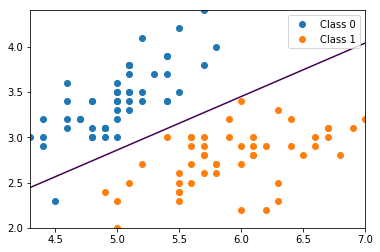

In [6]:
#Lets plot our decision boundary with the data
plt.plot(X0[:,0],X0[:,1],'o',label='Class 0')
plt.plot(X1[:,0],X1[:,1],'o',label='Class 1')
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = np.array(predict_proba(grid,theta)).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5])
plt.legend()
plt.show()

In [7]:
%%timeit
#fit using the fit method, turn verbose to false
theta = fit(X,y,num_iter,alpha,verbose = False)

3.39 s ± 12.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
%%memit
#fit using the fit method, turn verbose to false
theta = fit(X,y,num_iter,alpha,verbose = False)

peak memory: 114.69 MiB, increment: 0.15 MiB


# Iteration 1: Get Rid of Basic Loops
You will get rid of the loops in the helper functions `sigmoid`, `loss`, `predict`, and `accuracy`, and some of the loops in `fit`

Write code where it says 
`#WRITE CODE HERE`

In [ ]:
def add_intercept(X):
    #Add the intercept to our dataset
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)
    
def sigmoid(z):
    #KEEP THIS LINE
    z = np.array(z)
    #WRITE CODE HERE
    #NOTE: THIS CAN BE DONE IN 1 LINE
    
    ####################################

def loss(h, y):
    #WRITE CODE HERE
    #NOTE: THIS CAN BE DONE IN 1 LINE
    
    ####################################
    
def fit(X, y,num_iter,alpha,verbose=True):
    
    #add intercept
    X = add_intercept(X)
        
    # weights initialization
    theta = np.zeros(X.shape[1])
    
    #Note: we cannot remove this loop at there is a temporal relation here
    for it in range(num_iter):
        
        #Create z vector
        z = []
        for i in range(X.shape[0]):
            grad = 0
            for j in range(X.shape[1]):
                grad += X[i,j]*theta[j]
            z.append(grad)

        h = sigmoid(z)
        
        #Create gradient array
        gradient = []
        for j in range(X.shape[1]):
            grad_ele = 0
            for i in range(X.shape[0]):
                grad_ele += X[i,j]*(h-y)[i]
            gradient.append(grad_ele)

        #Divide all elements by number of examples
        #WRITE CODE HERE
        #NOTE: THIS CAN BE DONE IN 1 to 2 LINES
        #HINT: FIRST CAST `gradient` TO AN ARRAY, THEN DIVIDE

        ####################################
        
        #Update theta
        #WRITE CODE HERE
        #NOTE: THIS CAN BE DONE IN 1 LINE

        ####################################
        
        #Print if verbose
        if verbose:
            print('iter: {}, loss: {}'.format(it,loss(h,y)))
    
    return theta
    
def predict_proba(X,theta):
    X = add_intercept(X)
    
    #Create z vector
    z = []
    for i in range(X.shape[0]):
        grad = 0
        for j in range(X.shape[1]):
            grad += X[i,j]*theta[j]
        z.append(grad)
    return sigmoid(z)
    
def predict(X,theta):
    #WRITE CODE HERE
    #NOTE: THIS CAN BE DONE IN 1 LINE

    ####################################

def accuracy(y,y_pred):
    #WRITE CODE HERE
    #NOTE: THIS CAN BE DONE IN 1 LINE

    ####################################

In [ ]:
#Lets check the accuracy after 1000 iterations
theta = fit(X,y,num_iter,alpha)
y_pred = predict(X,theta)
print(accuracy(y,y_pred))
#You should get .99

In [ ]:
%%timeit
#fit using the fit method, turn verbose to false
theta = fit(X,y,num_iter,alpha,verbose = False)

In [ ]:
%%memit
#fit using the fit method, turn verbose to false
theta = fit(X,y,num_iter,alpha,verbose = False)

# Iteration 2: Get Rid of Inner Loops

Get rid of the inner loops in `fit` and `predict_proba`

Write code where it says 
`#WRITE CODE HERE`

Copy the code you wrote in iteration 1 where it says
`#COPY CODE FROM ITERATION 1 HERE`

In [ ]:
def add_intercept(X):
    #Add the intercept to our dataset
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)
    
def sigmoid(z):
    #KEEP THIS LINE
    z = np.array(z)
    #COPY CODE FROM ITERATION 1 HERE

    ####################################

def loss(h, y):
    #COPY CODE FROM ITERATION 1 HERE

    ####################################
    
def fit(X, y,num_iter,alpha,verbose=True):
    
    #add intercept
    X = add_intercept(X)
        
    # weights initialization
    theta = np.zeros(X.shape[1])
    
    #Note: we cannot remove this loop at there is a temporal relation here
    for it in range(num_iter):
        
        #Create z vector
        z = []
        for i in range(X.shape[0]):
            grad = 0
            
            #WRITE CODE HERE
            #NOTE: THIS CAN BE DONE IN 1 LINE

            ####################################
            
            z.append(grad)

        h = sigmoid(z)
        
        #Create gradient array
        gradient = []
        for j in range(X.shape[1]):
            
            #WRITE CODE HERE
            #NOTE: THIS CAN BE DONE IN 1 LINE
            #HINT: TO ACCESS THE jth COLUMN OF X WRITE X[:,j]

            ####################################
            
            gradient.append(grad_ele)

        #Divide all elements by number of examples
        #COPY CODE FROM ITERATION 1 HERE

        ####################################
        
        #Update theta
        #COPY CODE FROM ITERATION 1 HERE

        ####################################
        
        #Print if verbose
        if verbose:
            print('iter: {}, loss: {}'.format(it,loss(h,y)))
    
    return theta
    
def predict_proba(X,theta):
    X = add_intercept(X)
    
    #Create z vector
    z = []
    for i in range(X.shape[0]):
        
        #WRITE CODE HERE
        #NOTE: THIS IS THE SAME CODE AS FOR THE FIRST INNER LOOP IN `fit`

        ####################################
        
        z.append(grad)
    return sigmoid(z)
    
def predict(X,theta):
    #COPY CODE FROM ITERATION 1 HERE

    ####################################

def accuracy(y,y_pred):
    #COPY CODE FROM ITERATION 1 HERE

    ####################################

In [ ]:
#Lets check the accuracy after 1000 iterations
theta = fit(X,y,num_iter,alpha)
y_pred = predict(X,theta)
print(accuracy(y,y_pred))
#You should get .99

In [ ]:
%%timeit
#fit using the fit method, turn verbose to false
theta = fit(X,y,num_iter,alpha,verbose = False)

In [ ]:
%%memit
#fit using the fit method, turn verbose to false
theta = fit(X,y,num_iter,alpha,verbose = False)

# Iteration 3: No Loops (Except in Iterations)
You will get ride of the outerloop in `fit` and `predict proba`
This will confer a huge time save.

Write code where it says 
`#WRITE CODE HERE`

Copy the code you wrote in iteration 1 where it says
`#COPY CODE FROM ITERATION 1 HERE`

In [ ]:
def add_intercept(X):
    #Add the intercept to our dataset
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)
    
def sigmoid(z):
    #KEEP THIS LINE
    z = np.array(z)
    #COPY CODE FROM ITERATION 1 HERE

    ####################################

def loss(h, y):
    #COPY CODE FROM ITERATION 1 HERE

    ####################################
    
def fit(X, y,num_iter,alpha,verbose=True):
    
    #add intercept
    X = add_intercept(X)
        
    # weights initialization
    theta = np.zeros(X.shape[1])
    
    #Note: we cannot remove this loop at there is a temporal relation here
    for it in range(num_iter):
        
        
        #WRITE CODE HERE
        #NOTE: THIS CAN BE DONE IN 1 LINE
        #HINT: You'll have to use the axis argument in 
        #https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.sum.html

        ####################################


        h = sigmoid(z)
        
        #Create gradient array
        #WRITE CODE HERE
        #HINT: YOU'LL AGAIN HAVE TO USE THE AXIS ARGUMENT IN SUM
        #HINT2: TO TURN AN (n,) array to a (n,1) array use <ARR>[:,None]

        ####################################

        #Divide all elements by number of examples
        #COPY CODE FROM ITERATION 1 HERE

        ####################################
        
        #Update theta
        #COPY CODE FROM ITERATION 1 HERE

        ####################################
        
        #Print if verbose
        if verbose:
            print('iter: {}, loss: {}'.format(it,loss(h,y)))
    
    return theta
    
def predict_proba(X,theta):
    X = add_intercept(X)
    
    #Create z vector    
    #WRITE CODE HERE
    #NOTE: THIS IS THE SAME CODE AS FOR THE FIRST LOOP IN `fit`

    ####################################
        
    return sigmoid(z)
    
def predict(X,theta):
    #COPY CODE FROM ITERATION 1 HERE

    ####################################

def accuracy(y,y_pred):
    #COPY CODE FROM ITERATION 1 HERE

    ####################################

In [ ]:
#Lets check the accuracy after 1000 iterations
theta = fit(X,y,num_iter,alpha)
y_pred = predict(X,theta)
print(accuracy(y,y_pred))

In [ ]:
%%timeit
#fit using the fit method, turn verbose to false
theta = fit(X,y,num_iter,alpha,verbose = False)

In [ ]:
%%memit
#fit using the fit method, turn verbose to false
theta = fit(X,y,num_iter,alpha,verbose = False)

# Iteration 4: More Time Saves (Bonus)

For a Bonus 2 points, replace some of the sums with dot products. This is even faster.

Write code where it says 
`#REPLACE WITH DOT PRODUCT`

Copy the code you wrote in iteration 1 where it says
`#COPY CODE FROM ITERATION 1 HERE`

In [ ]:
def add_intercept(X):
    #Add the intercept to our dataset
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)
    
def sigmoid(z):
    #KEEP THIS LINE
    z = np.array(z)
    #COPY CODE FROM ITERATION 1 HERE

    ####################################

def loss(h, y):
    #COPY CODE FROM ITERATION 1 HERE

    ####################################
    
def fit(X, y,num_iter,alpha,verbose=True):
    
    #add intercept
    X = add_intercept(X)
        
    # weights initialization
    theta = np.zeros(X.shape[1])
    
    #Note: we cannot remove this loop at there is a temporal relation here
    for it in range(num_iter):
        
        #Create z vector
        
        #REPLACE WITH DOT PRODUCT
        #HINT: A @ B denotes the dot product of A and B

        ####################################

        h = sigmoid(z)
        
        #Create gradient array
        #REPLACE WITH DOT PRODUCT
        #HINT: TO TAKE THE TRANPOSE OF MATRIX A, USE A.T

        ####################################
        
        #Divide all elements by number of examples
        #COPY CODE FROM ITERATION 1 HERE

        ####################################
        
        #Update theta
        #COPY CODE FROM ITERATION 1 HERE

        ####################################
        
        #Print if verbose
        if verbose:
            print('iter: {}, loss: {}'.format(it,loss(h,y)))
    
    return theta
    
def predict_proba(X,theta):
    X = add_intercept(X)
    
    #Create z vector
    #WRITE CODE HERE
    #NOTE: THIS IS THE SAME CODE AS FOR THE DOT PRODUCT IN `fit`

    ####################################
        
    return sigmoid(z)
    
def predict(X,theta):
    #COPY CODE FROM ITERATION 1 HERE

    ####################################

def accuracy(y,y_pred):
    #COPY CODE FROM ITERATION 1 HERE

    ####################################

In [ ]:
#Lets check the accuracy after 1000 iterations
theta = fit(X,y,num_iter,alpha)
y_pred = predict(X,theta)
print(accuracy(y,y_pred))
#Should be .99

In [ ]:
%%timeit
#fit using the fit method, turn verbose to false
theta = fit(X,y,num_iter,alpha,verbose = False)

In [ ]:
%%memit
#fit using the fit method, turn verbose to false
theta = fit(X,y,num_iter,alpha,verbose = False)

# The way the pros implement it (No code to write, just observe)

In [9]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X,y)
preds = clf.predict(X)
#Check accuracy
accuracy(y,preds)

0.99

In [10]:
#Lets time it
clf = LogisticRegression()
%timeit clf.fit(X,y)

265 µs ± 715 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [11]:
#Lets mem it
clf = LogisticRegression()
%memit clf.fit(X,y)

peak memory: 118.14 MiB, increment: 0.01 MiB
